<a href="https://colab.research.google.com/github/abdoali2002/AI-ML/blob/main/SVR_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing and displaying dataset
# uses this dataset -> https://www.kaggle.com/aleksandrglotov/car-prices-poland
dataset = pd.read_csv('/content/drive/MyDrive/MSP/8th Task/crude-oil-price.csv')
dataset

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01T00:00:00,65.85,-19.479090,-15.93
465,2021-12-01T00:00:00,74.88,13.712984,9.03
466,2022-01-03T00:00:00,86.49,15.504808,11.61
467,2022-02-01T00:00:00,95.72,10.671754,9.23


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  468 non-null    float64
 3   change         468 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


In [7]:
#Create Copy of Dataset
dataset_orig = dataset.copy()

In [8]:
dataset.isna().any()

date             False
price            False
percentChange     True
change            True
dtype: bool

In [9]:
dataset['percentChange'] = dataset['percentChange'].fillna(0)
dataset['change'] = dataset['change'].fillna(0)

In [10]:
dataset.isna().any()

date             False
price            False
percentChange    False
change           False
dtype: bool

In [13]:
# Importing required package
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()
dataset['date'] = encode_x.fit_transform(dataset['date'])

In [14]:
dataset

,date,price,percentChange,change
0,0,29.27,0.000000,0.00
1,1,30.63,4.646396,1.36
2,2,30.25,-1.240614,-0.38
3,3,31.38,3.735537,1.13
4,4,32.00,1.975781,0.62
...,...,...,...,...
464,464,65.85,-19.479090,-15.93
465,465,74.88,13.712984,9.03
466,466,86.49,15.504808,11.61
467,467,95.72,10.671754,9.23


In [15]:
dataset.info() # checking if we still have any objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    int64  
 1   price          469 non-null    float64
 2   percentChange  469 non-null    float64
 3   change         469 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 14.8 KB


In [16]:
X = dataset['date'].values.reshape(-1, 1)  # -1 means that value is still to be determined
Y = dataset['price'].values.reshape(-1, 1)    # reshaping to have only 1 column

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
x2 = sc_X.fit_transform(X)
y2 = sc_Y.fit_transform(Y)

In [18]:
# Spliting the datdset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [19]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
regressor = SVR()
regressor.fit(X_train, Y_train.ravel())  # takes forever to run, might have to do with the amount data points
                                         # a possible solution is kernel approximation?

SVR()

In [20]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 1.27347976, -0.47005211, -0.65865332,  0.8794415 , -0.32099538,
       -0.91282169, -0.87576184, -0.87892542, -0.87615061,  1.10004477,
        1.23106091,  0.37660286,  0.27414506,  1.48034704,  0.82981137,
       -0.86810426,  1.28332039, -0.71370402,  1.37417893, -0.7840663 ,
        1.42422843, -0.41657438, -0.37928568, -0.57554609, -0.87303572,
       -0.87849334, -0.60460186, -0.91825286, -0.87884132, -0.91088152,
       -0.89173686, -0.87098791,  1.36289608, -0.55547349, -0.88038213,
       -0.90464686,  1.39434825,  1.3519668 , -0.45893767, -0.48720638,
        1.45404318,  0.59420618,  1.46418843,  1.24352989,  0.90969298,
        1.47646   ,  0.35568375,  1.28776124, -0.89049317,  0.86161541,
       -0.89802969, -0.55237325, -0.17482767, -0.77349937,  0.48668724,
        1.45510808, -0.87782419, -0.84680079,  0.37375328,  0.0543563 ,
        1.47414211,  1.10639943, -0.86658334, -0.86697865,  1.30771149,
        1.44413015, -0.85230711, -0.90328558, -0.86154344, -0.91

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
score = regressor.score(x2, y2)
print("R-squared:", score)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("\nRMSE: ", rmse)

R-squared: 0.8107976550924846

RMSE:  0.4567798206661356


Text(0, 0.5, 'Date')

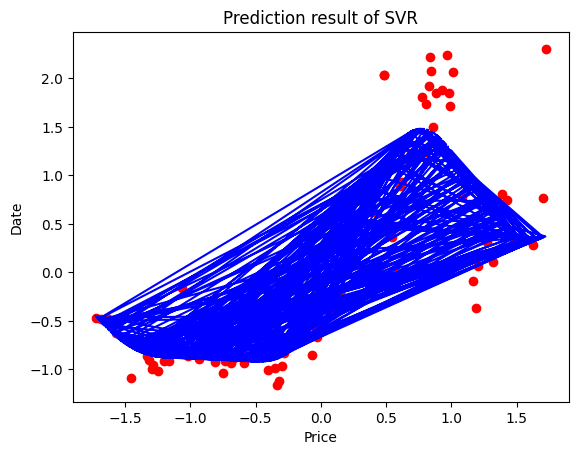

In [22]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('Prediction result of SVR')
plt.xlabel('Price')
plt.ylabel('Date')